In [56]:
from pandas_datareader import data
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import datetime

In [57]:
#Read the data
filename = 'all_stocks_5yr.csv'
stock = pd.read_csv(filename)
stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [58]:
stock.shape

(619040, 7)

In [59]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [60]:
stock.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [61]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [62]:
data_source = "yahoo" # Source of data is yahoo finance.
start_date = "2015-01-01"
end_date = "2017-12-31"
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

In [63]:
df.head().T

Date                  2014-12-31    2015-01-02    2015-01-05    2015-01-06  \
Attributes Symbols                                                           
Adj Close  AMZN     3.103500e+02  3.085200e+02  3.021900e+02  2.952900e+02   
           AAPL     2.505761e+01  2.481924e+01  2.412004e+01  2.412232e+01   
           WBA      6.425062e+01  6.408199e+01  6.281720e+01  6.297739e+01   
           NOC      1.325394e+02  1.317032e+02  1.289245e+02  1.296349e+02   
           BA       1.136834e+02  1.136572e+02  1.128701e+02  1.115406e+02   
...                          ...           ...           ...           ...   
Volume     XOM      1.133720e+07  1.022040e+07  1.850240e+07  1.667070e+07   
           CVX      6.411800e+06  5.898800e+06  1.175810e+07  1.159160e+07   
           VLO      5.925900e+06  5.897000e+06  7.732700e+06  8.586800e+06   
           F        1.793020e+07  2.477790e+07  4.407970e+07  3.298160e+07   
           BAC      5.781960e+07  4.895110e+07  1.056055e+08  1.449124e+08   

Date                  2015-01-07  
Attributes Symbols                
Adj Close  AMZN     2.984200e+02  
           AAPL     2.446056e+01  
           WBA      6.458789e+01  
           NOC      1.337354e+02  
           BA       1.132724e+02  
...                          ...  
Volume     XOM      1.359070e+07  
           CVX      1.035380e+07  
           VLO      8.825800e+06  
           F        2.606530e+07  
           BAC      1.046038e+08  

[144 rows x 5 columns]

In [64]:
stock_open = np.array(df["Open"]).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df["Close"]).T # stock_close is numpy array of transpose of df['Close']

In [65]:
movements = stock_close - stock_open
sum_of_movement = np.sum(movements,1)

In [66]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [67]:
for i in range(len(companies)):
    print("company:{}\tChange:{}".format(df["High"].columns[i],sum_of_movement[i]))

company:AMZN	Change:-83.93020629882812
company:AAPL	Change:3.5624732971191406
company:WBA	Change:-5.940071105957031
company:NOC	Change:72.03007507324219
company:BA	Change:100.44984436035156
company:LMT	Change:57.899932861328125
company:MCD	Change:51.290016174316406
company:INTC	Change:19.52003288269043
company:IBM	Change:15.669967651367188
company:TXN	Change:28.409912109375
company:MA	Change:23.569869995117188
company:MSFT	Change:28.480026245117188
company:GE	Change:36.07719421386719
company:AXP	Change:5.600105285644531
company:PEP	Change:36.96997833251953
company:KO	Change:11.459976196289062
company:JNJ	Change:30.619949340820312
company:TM	Change:-17.430099487304688
company:HMC	Change:-8.180000305175781
company:XOM	Change:9.929985046386719
company:CVX	Change:27.099990844726562
company:VLO	Change:29.399993896484375
company:F	Change:-5.559996604919434
company:BAC	Change:-3.780003547668457


In [68]:
len(companies)

24

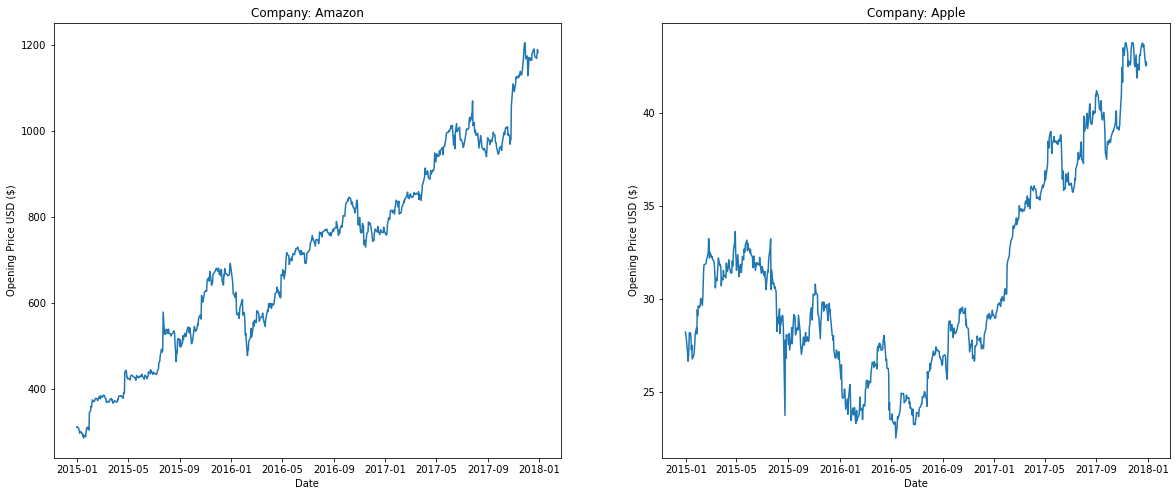

In [72]:
plt.figure(figsize = (20,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel("Opening Price USD ($)")
plt.plot(df["Open"]["AMZN"])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel("Opening Price USD ($)")
plt.plot(df["Open"]["AAPL"])
plt.savefig('pic1.png', dpi=300, bbox_inches='tight')
plt.show()

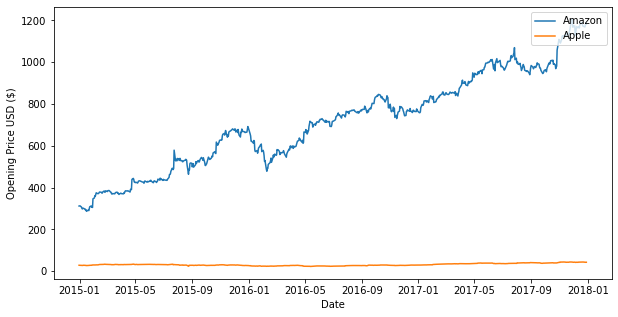

In [73]:
plt.figure(figsize = (10,5)) 
plt.xlabel("Date")
plt.ylabel("Opening Price USD ($)")
plt.plot(df["Open"]["AMZN"],label = "Amazon")
plt.plot(df["Open"]["AAPL"],label = "Apple")
plt.legend(loc="upper right")
plt.savefig('pic2.png', dpi=300, bbox_inches='tight')
plt.show()

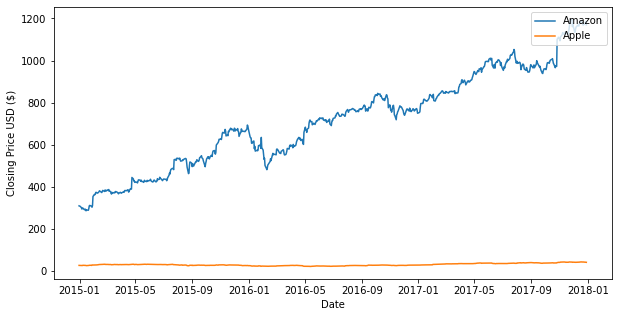

In [74]:
plt.figure(figsize = (10,5)) 
plt.xlabel("Date")
plt.ylabel("Closing Price USD ($)")
plt.plot(df["Close"]["AMZN"],label = "Amazon")
plt.plot(df["Close"]["AAPL"],label = "Apple")
plt.legend(loc="upper right")
plt.savefig('pic3.png', dpi=300, bbox_inches='tight')
plt.show()

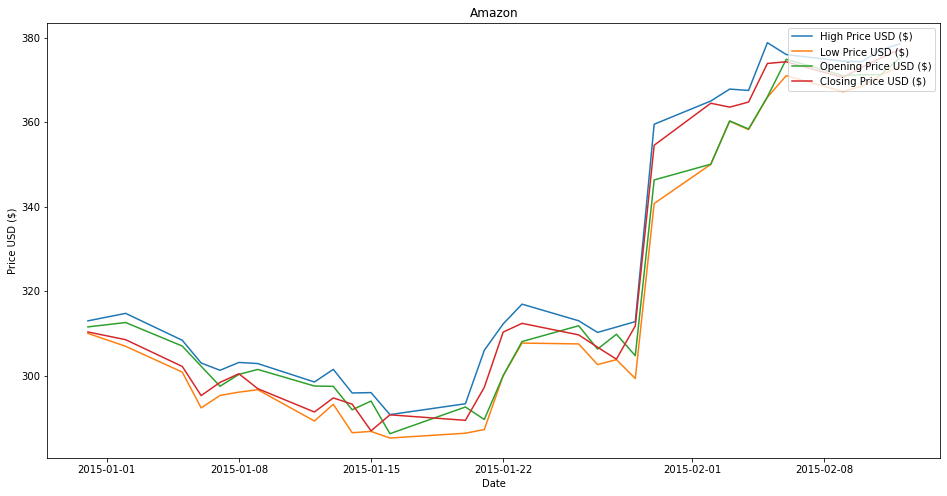

In [75]:
plt.figure(figsize = (16,8))
plt.title("Amazon",)
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df.iloc[0:30]["High"]["AMZN"],label = "High Price USD ($)")
plt.plot(df.iloc[0:30]["Low"]["AMZN"],label = "Low Price USD ($)")
plt.plot(df.iloc[0:30]["Open"]["AMZN"],label = "Opening Price USD ($)")
plt.plot(df.iloc[0:30]["Close"]["AMZN"],label = "Closing Price USD ($)")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic4.png', dpi=300, bbox_inches='tight')
plt.show()

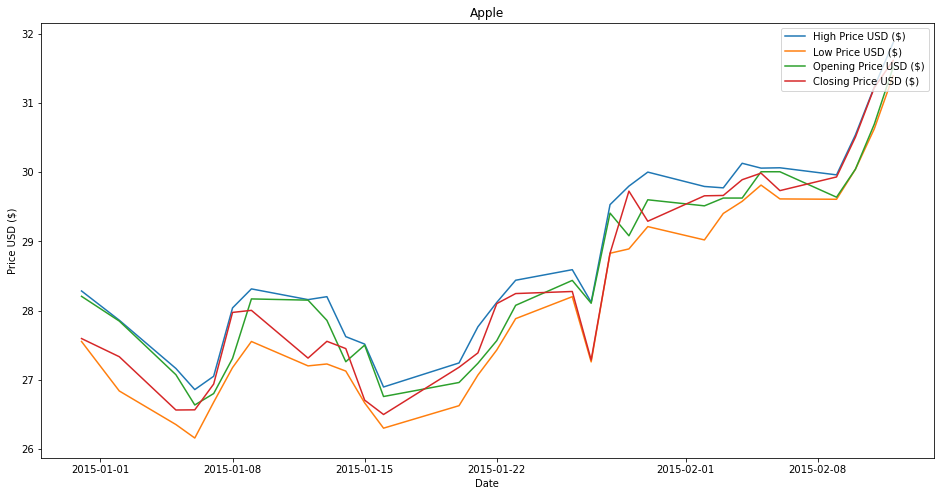

In [76]:
plt.figure(figsize = (16,8))
plt.title("Apple",)
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df.iloc[0:30]["High"]["AAPL"],label = "High Price USD ($)")
plt.plot(df.iloc[0:30]["Low"]["AAPL"],label = "Low Price USD ($)")
plt.plot(df.iloc[0:30]["Open"]["AAPL"],label = "Opening Price USD ($)")
plt.plot(df.iloc[0:30]["Close"]["AAPL"],label = "Closing Price USD ($)")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic5.png', dpi=300, bbox_inches='tight')
plt.show()

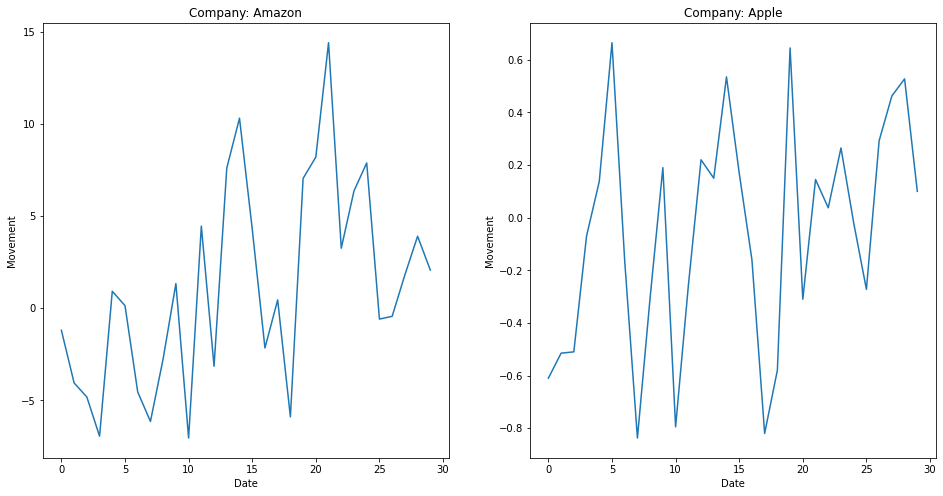

In [77]:
plt.figure(figsize = (16,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[0][0:30])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[1][0:30])
plt.savefig('pic6.png', dpi=300, bbox_inches='tight')
plt.show()

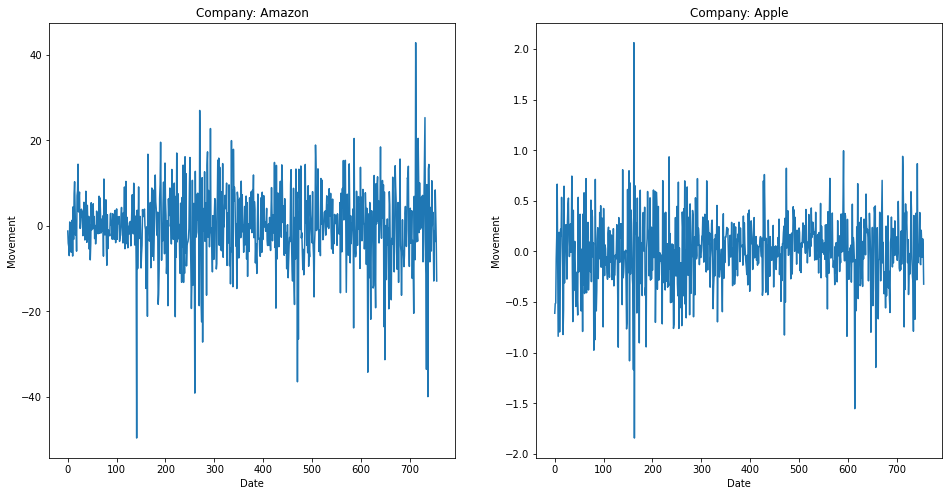

In [78]:
plt.figure(figsize = (16,8)) 
plt.subplot(1,2,1) 
plt.title("Company: Amazon")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[0])
plt.subplot(1,2,2) 
plt.title("Company: Apple")
plt.xlabel("Date")
plt.ylabel('Movement')
plt.plot(movements[1])
plt.savefig('pic7.png', dpi=300, bbox_inches='tight')
plt.show()

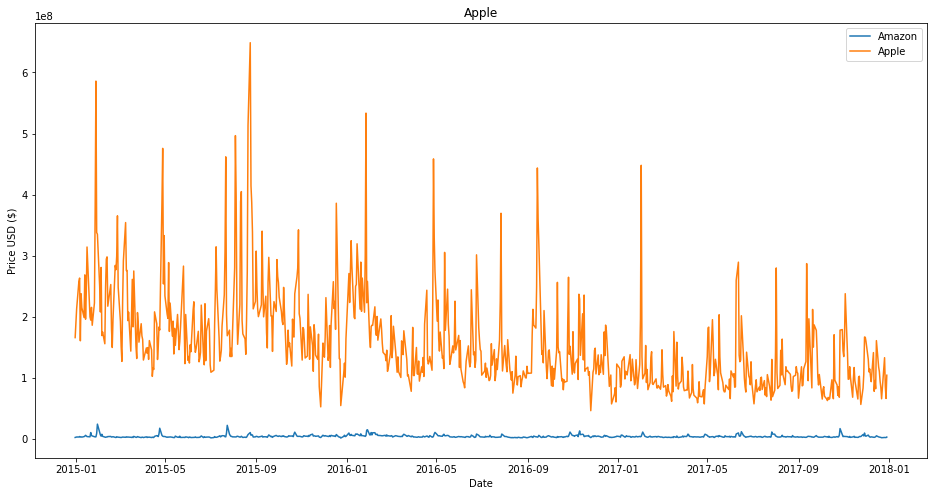

In [79]:
plt.figure(figsize = (16,8))
plt.title("Apple",)
plt.xlabel("Date")
plt.ylabel("Price USD ($)")
plt.plot(df["Volume"]["AMZN"],label = "Amazon")
plt.plot(df["Volume"]["AAPL"],label = "Apple")
plt.legend(loc="upper right") # Properties of legend box
plt.savefig('pic8.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [81]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.259844372052625
0.26029795916062815
0.0009127199292782757


In [82]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [83]:
df1 = pd.DataFrame({"labels":labels,"companies":list(companies)}).sort_values(by=["labels"],axis = 0)
df1.head()

,labels,companies
0,0,"(Apple, AAPL)"
10,0,"(Intel, INTC)"
6,0,"(Ford, F)"
11,0,"(Johnson & Johnson, JNJ)"
12,1,"(Coca Cola, KO)"


In [84]:
from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
df2.head()

,labels,companies
21,0,Valero Energy
18,0,Honda
17,0,Toyota
13,0,American Express
3,1,Northrop Grumman


<Figure size 432x288 with 0 Axes>

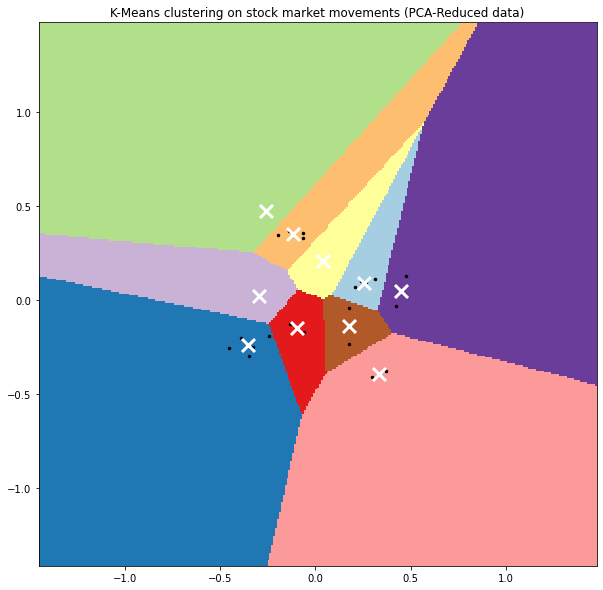

In [85]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = "nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = "auto",origin = "lower")
plt.plot(reduced_data[:,0],reduced_data[:,1],"k.",markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 169,linewidths = 3,color = "w",zorder = 10)
plt.title("K-Means clustering on stock market movements (PCA-Reduced data)")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.savefig('pic9.png', dpi=300, bbox_inches='tight')
plt.show()